# Hypothesis3：
# We expect there is a strong positive correlation between the number of electric and plug-in hybrid vehicles sold compared to the number of public charging stations in the same region.

### In Hypothesis 3, after the analysis of the previous Hypothesis 2, we want to continue to explore what factors are related to the number of electric vehicles. We first think of the number of charging piles, because the density of charging piles determines the difficulty of charging electric vehicles in this area. Therefore, we think that the number of charging piles will affect the development of electric vehicles in a region. Therefore, we use univariate linear regression to analyze the linear relationship between these two variables.

In [3]:
import pandas as pd
from pandas import DataFrame
import os.path
import matplotlib.pyplot as plt
from pylab import *
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import doctest

## US Population in Each Zip

In [4]:
us_zip_df = pd.read_csv('data/uszips.csv')

In [5]:
us_zip_df = DataFrame(us_zip_df)

In [6]:
us_zip_df = us_zip_df[['zip','state_id','population']]

NY Population in Each Zip

In [7]:
us_zip_df_ny = us_zip_df[us_zip_df['state_id'] == 'NY']

In [8]:
us_zip_df_ny = us_zip_df_ny[['zip','population']]

In [9]:
us_zip_df_ny = us_zip_df_ny.rename(columns={'zip':'ZIP Code'})

TX Population in Each Zip

In [10]:
us_zip_df_tx = us_zip_df[us_zip_df['state_id'] == 'TX']

In [11]:
us_zip_df_tx = us_zip_df_tx[['zip', 'population']]
us_zip_df_tx = us_zip_df_tx.rename(columns={'zip':'ZIP Code'})

In [12]:
us_zip_df_tx = us_zip_df_tx.fillna(0)

WA Population in Each Zip

In [13]:
us_zip_df_wa = us_zip_df[us_zip_df['state_id'] == 'WA']

In [14]:
us_zip_df_wa = us_zip_df_wa[['zip', 'population']]
us_zip_df_wa = us_zip_df_wa.rename(columns={'zip':'ZIP Code'})


In [15]:
us_zip_df_wa = us_zip_df_wa.fillna(0)

## Ev Station Count in Each Zip Code

In [30]:
ev_station_data = pd.read_csv('data/ev_stations_v1.csv')
ev_station_data = DataFrame(ev_station_data)

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
ev_station_data.head(10)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ELEC,State Capitol Parking Garage,1303 10th St,At 12th and N St,Sacramento,CA,95814,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ELEC,LADWP - Harbor Generating Station,161 N Island Ave,At B St,Wilmington,CA,90744,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ELEC,LADWP - Sylmar West,13201 Sepulveda Blvd,NaN,Sylmar,CA,91342,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ELEC,LADWP - EV Service Center,1630 N Main St,NaN,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ELEC,LADWP - Fairfax Center,2311 S Fairfax Ave,NaN,Los Angeles,CA,90016,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ev_station_data.loc[:,'State'].value_counts()

CA    14651
NY     2977
FL     2665
TX     2319
MA     2198
WA     1775
CO     1627
GA     1588
MD     1263
PA     1166
VA     1142
NC     1124
IL     1068
MO     1053
OR      992
OH      976
UT      908
AZ      890
MI      831
NJ      749
TN      683
MN      583
CT      533
KS      494
WI      479
NV      458
SC      391
HI      386
IN      354
VT      331
OK      314
ME      302
DC      292
IA      284
AL      278
RI      257
KY      225
NM      191
NE      177
NH      166
AR      165
LA      158
ID      138
DE      133
MS      115
WV      111
MT       80
WY       70
ND       61
SD       58
AK       53
PR        5
ON        2
Name: State, dtype: int64

In [29]:
def ev_station_count_df(file,state):
    """ Count the ev station of each data and return a dataframe

    :param file: ev station file
    :param state: string for three state
    :return: the dataframe of the count of ev station of each state

    >>> a1 = DataFrame(data =[['NY','12866'],['NY','14203'],['NY','12866'],['TX','12334']] ,columns=['State', 'ZIP'])
    >>> b1 = ev_station_count_df(a1,'NY')
    >>> print(b1['Count'][0])
    2
    >>> a2 = DataFrame(data =[['NY','12866'],['NY','14203'],['NY','12866'],['TX','12334']] ,columns=['State', 'ZIP'])
    >>> b2 = ev_station_count_df(a2,'All')
    >>> print(b2['ZIP Code'][0])
    12866
    >>> print(type(b2))
    <class 'pandas.core.frame.DataFrame'>
    """
    if state == 'All':
        file_clean = file
    else:
        file_clean = file[file['State']==state]
    file_count = file_clean.loc[:,'ZIP'].value_counts()
    file_count_df = DataFrame(file_count)
    file_count_df = file_count_df.rename_axis('ZIP Code').reset_index()
    ev_station_count = file_count_df.rename(columns={'ZIP': 'Count'})
    return ev_station_count

In [18]:
ev_station_count_df(ev_station_data,'All')

,ZIP Code,Count
0,94025,259
1,95054,235
2,92618,134
3,94080,115
4,94025,113
...,...,...
13576,72076,1
13577,14530,1
13578,22963,1
13579,32433,1


New York State EV Station data

In [19]:
ev_station_count_df(ev_station_data,'NY')

,ZIP Code,Count
0,12866,50
1,14203,30
2,14623,26
3,14850,24
4,12401,24
...,...,...
919,13339,1
920,13669,1
921,12043,1
922,12165,1


In [20]:
ev_station_count_ny = ev_station_count_df(ev_station_data,'NY')

 Texas State EV Station data

In [21]:
ev_station_count_tx = ev_station_count_df(ev_station_data,'TX')

In [22]:
ev_station_count_tx

,ZIP Code,Count
0,78701,43
1,76155,34
2,77002,27
3,75201,26
4,77004,26
...,...,...
739,75207,1
740,75672,1
741,78504,1
742,77802,1


Washington State EV Station data

In [23]:
ev_station_count_wa = ev_station_count_df(ev_station_data,'WA')

In [24]:
ev_station_count_wa

,ZIP Code,Count
0,98004,57
1,98121,51
2,98109,49
3,98004,49
4,99354,46
...,...,...
436,98642,1
437,99403,1
438,98037,1
439,99204,1


## Ev Car Count in Each Zip Code

In [43]:
newyork_data = pd.read_csv('data/ny_ev_registrations_public.csv')
texas_data = pd.read_csv('data/tx_ev_registrations_public.csv')
washington_data = pd.read_csv('data/wa_ev_registrations_public.csv',low_memory = False)

Newyork State Car Count

In [106]:
newyork_data

,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,DMV Snapshot,VIN Model Year,Registration Expiration Date,State,Vehicle Name,Technology
0,11797,2020-02-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-12-19,NY,Tesla Model X,BEV
1,11215,2018-09-21,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-20,NY,Tesla Model X,BEV
2,11040,2018-12-03,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2021-01-08,NY,Tesla Model X,BEV
3,11215,2018-09-30,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-09-29,NY,Tesla Model X,BEV
4,11976,2018-09-11,5YJXCBE2,39,NY DATA.NY.GOV (4/2/2020),J,2020-08-09,NY,Tesla Model X,BEV
...,...,...,...,...,...,...,...,...,...,...
2910283,10706,2021-04-28,JTDKAMFP,63,NY DATA.NY.GOV (4/1/2022),M,2023-04-27,NY,Toyota Prius Prime,PHEV
2910284,10708,2021-01-16,JTDKAMFP,63,NY DATA.NY.GOV (4/1/2022),M,2023-01-15,NY,Toyota Prius Prime,PHEV
2910285,14845,2021-04-24,JTDKAMFP,63,NY DATA.NY.GOV (4/1/2022),M,2023-04-23,NY,Toyota Prius Prime,PHEV
2910286,13850,2021-05-14,JTDKAMFP,63,NY DATA.NY.GOV (4/1/2022),M,2023-05-13,NY,Toyota Prius Prime,PHEV


In [27]:
def ev_car_count_df(file):
    """ Calculate the number of car in each zip code

    :param file:state car data
    :return:the car count of each state
    >>> a1 = DataFrame(data =[['NY','12866'],['NY','14203'],['NY','12866']] ,columns=['State', 'ZIP'])
    >>> b1 = ev_station_count_df(a1,'NY')
    >>> print(b1['Count'][0])
    2
    >>> print(type(b1))
    <class 'pandas.core.frame.DataFrame'>
    """
    file = DataFrame(file)
    file_count = file.loc[:,'ZIP Code'].value_counts()
    file_count_df = DataFrame(file_count)
    file_count_df = file_count_df.rename(columns={'ZIP Code': 'Count'})
    ev_car_count = file_count_df.rename_axis('ZIP Code').reset_index()
    return ev_car_count

In [27]:
ev_car_count_ny = ev_car_count_df(newyork_data)

In [28]:
ev_car_count_ny

,ZIP Code,Count
0,11746,31256
1,10583,31051
2,14850,27366
3,11743,21618
4,11791,21534
...,...,...
3570,10654,1
3571,16693,1
3572,6068,1
3573,40202,1


Texas State Car Count

In [29]:
ev_car_count_df(texas_data)

,ZIP Code,Count
0,75035,12107
1,77479,11976
2,78746,10033
3,78613,10013
4,78704,9262
...,...,...
1645,76004,1
1646,76097,1
1647,75555,1
1648,77548,1


In [30]:
ev_car_count_tx = ev_car_count_df(texas_data)

Washington State Car Count

In [31]:
ev_car_count_df(washington_data)

,ZIP Code,Count
0,98052,69190
1,98033,45620
2,98115,43273
3,98004,42905
4,98006,41084
...,...,...
1099,20009,1
1100,23801,1
1101,21061,1
1102,97266,1


In [32]:
ev_car_count_wa = ev_car_count_df(washington_data)

## Descriptive Statistics of car_count and ev_station count

Descriptive Statistics of Car Count

In [33]:
ev_car_count_ny_discribe = ev_car_count_ny[['Count']].describe()

In [34]:
ev_car_count_ny_discribe = ev_car_count_ny_discribe.rename(columns = {'Count':'NY_Car_Count'})

In [35]:
ev_car_count_ny_discribe

,NY_Car_Count
count,3575.000000
mean,814.066573
std,2203.457525
min,1.000000
25%,1.000000
50%,19.000000
75%,409.000000
max,31256.000000


In [36]:
ev_car_count_tx_discribe = ev_car_count_tx[['Count']].describe()
ev_car_count_tx_discribe = ev_car_count_tx_discribe.rename(columns={'Count': 'TX_Car_Count'})
ev_car_count_tx_discribe

,TX_Car_Count
count,1650.000000
mean,626.183030
std,1328.413634
min,1.000000
25%,18.000000
50%,92.000000
75%,508.500000
max,12107.000000


In [37]:
ev_car_count_wa_discribe = ev_car_count_wa[['Count']].describe()
ev_car_count_wa_discribe = ev_car_count_wa_discribe.rename(columns={'Count': 'WA_Car_Count'})
ev_car_count_wa_discribe

,WA_Car_Count
count,1104.000000
mean,2142.063406
std,5904.039509
min,1.000000
25%,4.000000
50%,18.000000
75%,871.000000
max,69190.000000


In [38]:
all_state_car_count_df = pd.concat([ev_car_count_ny_discribe,ev_car_count_tx_discribe,ev_car_count_wa_discribe],axis=1)

In [39]:
all_state_car_count_df

,NY_Car_Count,TX_Car_Count,WA_Car_Count
count,3575.000000,1650.000000,1104.000000
mean,814.066573,626.183030,2142.063406
std,2203.457525,1328.413634,5904.039509
min,1.000000,1.000000,1.000000
25%,1.000000,18.000000,4.000000
50%,19.000000,92.000000,18.000000
75%,409.000000,508.500000,871.000000
max,31256.000000,12107.000000,69190.000000


After the descriptive statistics calculation of electric vehicles in each state, we found that the largest average is Washington State, indicating that in each zip code, Washington State has a higher number of electric vehicles, but also in the calculation of the standard deviation, Washington State The degree of data dispersion is also the highest, which also shows that although the average value of Washington is high, the data is too scattered and the range of change is large.

Descriptive Statistics of Station Count

In [40]:
ev_station_count_ny_discribe = ev_station_count_ny[['Count']].describe()
ev_station_count_ny_discribe = ev_station_count_ny_discribe.rename(columns={'Count': 'NY_Station_Count'})
ev_station_count_ny_discribe

,NY_Station_Count
count,924.000000
mean,3.221861
std,4.196103
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,50.000000


In [41]:
ev_station_count_tx_discribe = ev_station_count_tx[['Count']].describe()
ev_station_count_tx_discribe = ev_station_count_tx_discribe.rename(columns={'Count': 'TX_Station_Count'})
ev_station_count_tx_discribe

,TX_Station_Count
count,744.000000
mean,3.116935
std,3.998456
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,43.000000


In [42]:
ev_station_count_wa_discribe = ev_station_count_wa[['Count']].describe()
ev_station_count_wa_discribe = ev_station_count_wa_discribe.rename(columns={'Count': 'WA_Station_Count'})
ev_station_count_wa_discribe

,WA_Station_Count
count,441.000000
mean,4.024943
std,6.619998
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,57.000000


In [43]:
all_state_station_count_df = pd.concat([ev_station_count_ny_discribe, ev_station_count_tx_discribe, ev_station_count_wa_discribe],axis=1)
all_state_station_count_df

,NY_Station_Count,TX_Station_Count,WA_Station_Count
count,924.000000,744.000000,441.000000
mean,3.221861,3.116935,4.024943
std,4.196103,3.998456,6.619998
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,4.000000,3.000000,4.000000
max,50.000000,43.000000,57.000000


## Correlation analysis

All Three State Correlation Analysis

In [127]:
def merge_count_data(x_data, y_data, x_col_name, y_col_name):
    """ Merge car_count_data and station_count_file

    :param x_data: dataframe of x (count in each zip code)
    :param y_data: dataframe of y (count in each zip code)
    :param x_col_name: the column name in the dataframe x
    :param y_col_name: the column name in the dataframe y
    :return: a dataframe of the merging result

    >>> a1 = DataFrame(data =[['98110','28280'],['98029','24224'],['12345','0']] ,columns=['ZIP Code', 'Count'])
    >>> a2 = DataFrame(data =[['98110','3'],['98029','4'],['12345','0']] ,columns=['ZIP Code', 'Count'])
    >>> b1 = merge_count_data(a2,a1,'Station Count','Car Count')
    >>> print(b1['Station Count'][0])
    3
    >>> print(type(b1))
    <class 'pandas.core.frame.DataFrame'>
    """
    merge_data = pd.merge(x_data, y_data, how='left', on='ZIP Code')
    x_colume= merge_data.iloc[:,[1]]
    y_colume= merge_data.iloc[:,[2]]
    x_list= x_colume.columns.values.tolist()
    y_list= y_colume.columns.values.tolist()
    merge_data = merge_data.rename(columns={x_list[0]: x_col_name, y_list[0]: y_col_name})
    merge_data = merge_data.fillna(0)
    #ny_merge_data = ny_merge_data[['Station Count', 'Car Count']]
    merge_data_clean = merge_data.drop(merge_data[merge_data[y_col_name] == 0].index)
    return merge_data_clean

In [128]:
doctest.testmod()

TestResults(failed=0, attempted=16)

In [131]:
def linear_model_main(data, x_str, y_str):
    """ Show the linear regression plot of the relation of car_count and station_count in each zip code.

    :param data: a dataframe of the merging file (car_count and ev-station_count)
    :param x_str: the column name of x
    :param y_str: the column name of y
    :return: the linear regression plot
    """
    x = data[[x_str]]
    y = data[[y_str]]
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    plt.scatter(data[x_str],data[y_str])
    y_train = model.predict(x)
    plt.plot(x,y_train,color = 'red',label = 'line')
    plt.ylabel(y_str)
    plt.xlabel(x_str)
    plt.show()

In [46]:
all_car_count_df = pd.concat([ev_car_count_wa,ev_car_count_ny,ev_car_count_tx],axis=0)

In [47]:
all_car_count_df

,ZIP Code,Count
0,98052,69190
1,98033,45620
2,98115,43273
3,98004,42905
4,98006,41084
...,...,...
1645,76004,1
1646,76097,1
1647,75555,1
1648,77548,1


In [48]:
all_station_count_df = pd.concat([ev_station_count_wa,ev_station_count_ny,ev_station_count_tx],axis=0)

In [49]:
all_population_data = pd.concat([us_zip_df_wa,us_zip_df_ny,us_zip_df_tx],axis=0)

In [50]:
all_population_data = all_population_data.rename(columns={'zip':'ZIP Code'})

In [51]:
all_station_count_df

,ZIP Code,Count
0,98004,57
1,98121,51
2,98109,49
3,98004,49
4,99354,46
...,...,...
739,75207,1
740,75672,1
741,78504,1
742,77802,1


The correlation between all_car_count and all_station_count

In [52]:
all_merge_data_car_station = merge_count_data(all_station_count_df,all_car_count_df,'Station Count','Car Count')

In [53]:
all_merge_data_car_station

,ZIP Code,Station Count,Car Count
0,98004,57,42905.0
1,98121,51,10804.0
2,98109,49,23663.0
5,98101,40,1.0
12,98104,18,17446.0
...,...,...,...
2121,76513,1,1070.0
2122,75211,1,528.0
2123,75207,1,329.0
2125,78504,1,2.0


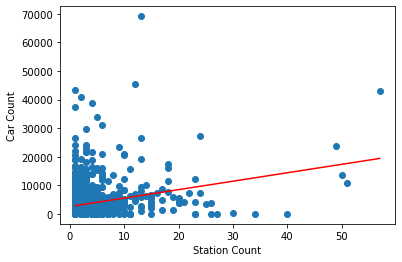

In [54]:
linear_model_main(all_merge_data_car_station,'Station Count','Car Count')

<AxesSubplot:>

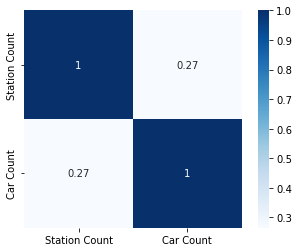

In [55]:
corr_all = all_merge_data_car_station[['Station Count','Car Count']].corr()
sns.heatmap(corr_all, cmap ='Blues', square = True, annot = True)

As can be seen from the figure, the correlation coefficient is 0.27, which is not correlated. Therefore, the total number of vehicles in the three states is not related to the number of corresponding charging points.

The correlation between all_car_count and all_population_count

In [56]:
all_population_data

,ZIP Code,population
32938,98001,34455.0
32939,98002,33947.0
32940,98003,49445.0
32941,98004,37265.0
32942,98005,21414.0
...,...,...
28344,79932,28893.0
28345,79934,26360.0
28346,79935,18546.0
28347,79936,108668.0


In [57]:
all_merge_data_car_pop = merge_count_data(all_population_data,all_car_count_df,'Population','Car Count')

In [58]:
all_merge_data_car_pop

,ZIP Code,Population,Car Count
7,98008,25650.0,1.0
19,98026,38292.0,3.0
20,98027,30240.0,1.0
22,98029,29956.0,1.0
26,98033,39802.0,9.0
...,...,...,...
4013,78738,15090.0,1.0
4019,78746,27671.0,14.0
4023,78750,33860.0,1.0
4028,78756,9450.0,1.0


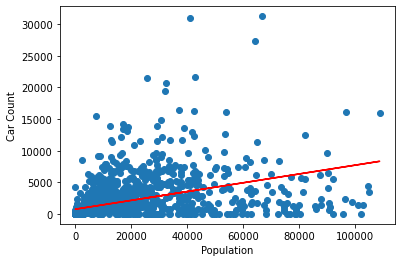

In [59]:
linear_model_main(all_merge_data_car_pop,'Population','Car Count')

<AxesSubplot:>

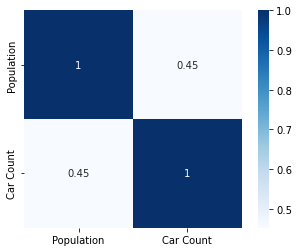

In [60]:
corr_all = all_merge_data_car_pop[['Population','Car Count']].corr()
sns.heatmap(corr_all, cmap ='Blues', square = True, annot = True)

As can be seen from the figure, the correlation coefficient is 0.45, which is not correlated. Therefore, the total number of cars in the three states is weakly correlated with their corresponding population.

New York State Correlation analysis

In [61]:
merge_data_clean_ny = merge_count_data(ev_station_count_ny,ev_car_count_ny,'Station Count','Car Count')

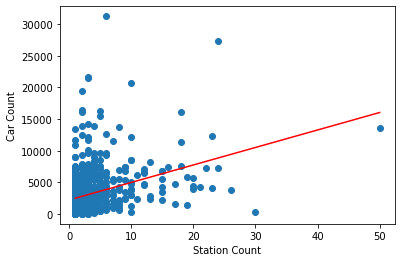

In [62]:
linear_model_main(merge_data_clean_ny,'Station Count','Car Count')

<AxesSubplot:>

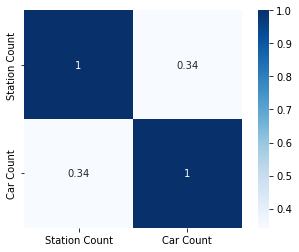

In [63]:
corr_ny = merge_data_clean_ny[['Station Count','Car Count']].corr()
sns.heatmap(corr_ny, cmap ='Blues', square = True, annot = True)

As can be seen from the figure, the correlation coefficient is 0.34, which is not correlated. Therefore, the number of cars in New York State is weakly correlated with the number of corresponding charging piles.

Texas State Correlation Analysis

In [64]:
merge_data_clean_tx = merge_count_data(ev_station_count_tx,ev_car_count_tx,'Station Count','Car Count')

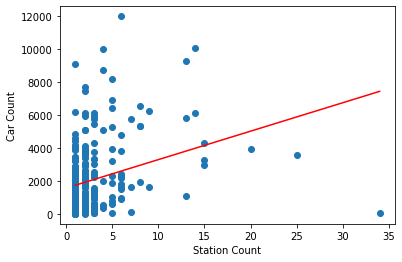

In [66]:
linear_model_main(merge_data_clean_tx,'Station Count','Car Count')

<AxesSubplot:>

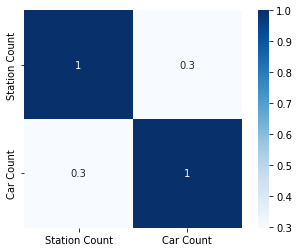

In [67]:
corr_tx = merge_data_clean_tx[['Station Count','Car Count']].corr()
sns.heatmap(corr_tx, cmap ='Blues', square = True, annot = True)

As can be seen from the figure, the correlation coefficient is 0.3, which is not correlated. Therefore, the number of cars in Texas State is weakly correlated with the number of corresponding charging piles.

Washington State Correlation Analysis

In [68]:
merge_data_clean_wa = merge_count_data(ev_station_count_wa,ev_car_count_wa,'Station Count','Car Count')

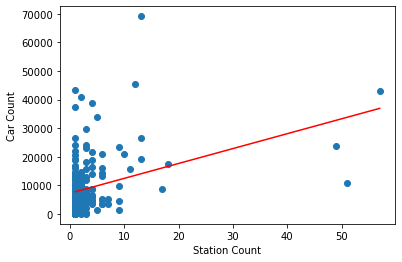

In [70]:
linear_model_main(merge_data_clean_wa,'Station Count','Car Count')

<AxesSubplot:>

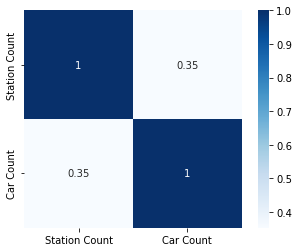

In [71]:
corr_wa = merge_data_clean_wa[['Station Count','Car Count']].corr()
sns.heatmap(corr_wa, cmap ='Blues', square = True, annot = True)

As can be seen from the figure, the correlation coefficient is 0.35, which is not correlated. Therefore, the number of cars in Washington State is weakly correlated with the number of corresponding charging piles.

# Further Analysis (cont.)

### What’s more, Mr Weible suggested, considering the fact that Battery Cars always need to charge in the range of only a few hundred kilometers, the decision of PHEV or BEV by the consumer may be influenced by the Charging Station around them. So we compare the total number of EV stations and PHEV rate of all EV vehicles in those regions by zip code.

In [146]:
import statsmodels.api as sm
us_zip_df = pd.read_csv('data/uszips.csv')
us_zip_df = us_zip_df[['zip', 'state_id', 'population', 'density']]
us_zip_df['area'] = us_zip_df['population'] / us_zip_df['density']
us_zip_df = us_zip_df.rename(columns={'zip': 'ZIP Code'})
us_zip_df_ny = us_zip_df[us_zip_df['state_id'] == 'NY']
us_zip_df_wa = us_zip_df[us_zip_df['state_id'] == 'WA']
us_zip_df_tx = us_zip_df[us_zip_df['state_id'] == 'TX']
us_zip_df_wa = us_zip_df_wa[['ZIP Code', 'population', 'density', 'area']]
us_zip_df_ny = us_zip_df_ny[['ZIP Code', 'population', 'density', 'area']]
us_zip_df_tx = us_zip_df_tx[['ZIP Code', 'population', 'density', 'area']]
us_zip_df_ny.fillna(0, inplace=True)
us_zip_df_tx.fillna(0, inplace=True)
us_zip_df_wa.fillna(0, inplace=True)

In [175]:
def ev_car_phev_count_df(data: str) -> pd.DataFrame:
    """ Calculate the number of car and PHEV rate in each zip code

    :param data:state car registration data
    :return:the car count and phev rate of each state
    """
    data_count = data.loc[:,'ZIP Code'].value_counts().sort_index(axis=0)
    phev_count = data[data['Technology'] == 'PHEV'].loc[:,'ZIP Code'].value_counts().sort_index(axis=0)
    file_count_df = DataFrame(data_count)
    file_count_df = file_count_df.rename(columns={'ZIP Code': 'Count'})
    ev_car_count = file_count_df.rename_axis('ZIP Code').reset_index()
    phev_count_df = DataFrame(phev_count)
    phev_rate = phev_count_df.rename(columns={'ZIP Code': 'PHEV Count'})
    phev_rate = phev_rate.rename_axis('ZIP Code').reset_index()
    ev_car_count = pd.merge(ev_car_count, phev_rate, how='left', on='ZIP Code')
    ev_car_count.fillna(0, inplace=True)
    ev_car_count['PHEV Rate'] = ev_car_count['PHEV Count'] / ev_car_count['Count']
    return ev_car_count

In [195]:
def filter_car_station_data(ev_station_count, state_data, us_zip_df):
    """ filter specific columns for the linear regression model

    :param ev_station_count: the dataframe for ev station count by zip code
    :param state_data: the dataframe for specific state registration data
    :param us_zip_df: the dataframe for the state zip code data
    :return: the dataframe for all the merged message
    """
    ev_station_count = ev_station_count.rename(columns={'Count': 'Station Count'})
    ev_car_count = ev_car_phev_count_df(state_data)
    ev_car_station = pd.merge(ev_car_count, ev_station_count, how='left', on='ZIP Code')
    ev_car_station.dropna(axis=0, how='any', inplace=True)
    ev_car_station['ZIP Code'] = ev_car_station['ZIP Code'].astype('int64')

    ev_car_station_pop = pd.merge(ev_car_station, us_zip_df, how='left', on='ZIP Code')
    ev_car_station_pop.fillna(0, inplace=True)
    ev_car_station_pop = ev_car_station_pop[ev_car_station_pop['Count'] > 10]
    ev_car_station_pop = ev_car_station_pop[ev_car_station_pop['Station Count'] > 2]
    ev_car_station_pop = ev_car_station_pop[ev_car_station_pop['population'] > 500]
    ev_car_station_pop = ev_car_station_pop[['ZIP Code', 'Station Count', 'Count', 'PHEV Rate', 'population', 'area']]
    return ev_car_station_pop

## New York State

In [196]:
ev_station_count_ny = ev_station_count_df(ev_station_data, 'NY')
ev_car_station_pop_ny = filter_car_station_data(ev_station_count_ny, newyork_data, us_zip_df_ny)
ev_car_station_pop_ny

,ZIP Code,Station Count,Count,PHEV Rate,population,area
0,10001,10.0,3815,0.360419,25026.0,1.615696
1,10002,5.0,3546,0.448393,74363.0,2.129726
2,10003,12.0,6541,0.307292,54671.0,1.480443
4,10005,3.0,1242,0.233494,8664.0,0.188727
5,10007,5.0,15492,0.554932,7566.0,0.414128
...,...,...,...,...,...,...
556,14830,4.0,3787,0.735939,19138.0,234.822086
560,14845,5.0,3390,0.701770,20401.0,202.591857
561,14850,24.0,27366,0.626398,64224.0,323.220936
562,14853,3.0,413,0.276029,2663.0,0.996669


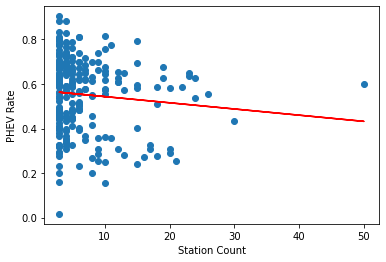

<AxesSubplot:>

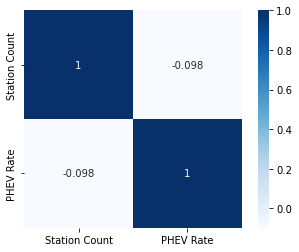

In [197]:
linear_model_main(ev_car_station_pop_ny, 'Station Count', 'PHEV Rate')
corr_all = ev_car_station_pop_ny[['Station Count', 'PHEV Rate']].corr()
sns.heatmap(corr_all, cmap='Blues', square=True, annot=True)

As the scatter plot and heatmap show, the correlation between them is really low. EV station is not an independent variable for PHEV rate.


In [198]:
x = sm.add_constant(ev_car_station_pop_ny.iloc[:, 2:])
model = sm.OLS(ev_car_station_pop_ny['Station Count'], x)
result = model.fit()
result.summary()

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Station Count   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.460
Date:                Fri, 06 May 2022   Prob (F-statistic):            0.00174
Time:                        17:45:58   Log-Likelihood:                -720.98
No. Observations:                 228   AIC:                             1452.
Df Residuals:                     223   BIC:                             1469.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3192      1.575      4.013      0.000       3.216       9.422
Count          0.0002   9.28e-05      2.533      0.012    5.22e-05       0.000
PHEV Rate     -3.0173      2.492     -1.211      0.227      -7.928       1.893
population  3.189e-05   2.16e-05      1.473      0.142   -1.08e-05    7.46e-05
area           0.0058      0.004      1.443      0.151      -0.002       0.014
==============================================================================
Omnibus:                      160.074   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1579.638
Skew:                           2.700   Prob(JB):                         0.00
Kurtosis:                      14.710   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We also take EV station as the dependent variable, Using Multiple Linear Regression in python, The R-squared is 0.074 and each P-value is below 0.1. The linear regression model also cannot best explain the number of EV stations in each region.


## Washington State

In [201]:
ev_station_count_wa = ev_station_count_df(ev_station_data, 'WA')
ev_car_station_pop_wa = filter_car_station_data(ev_station_count_wa, washington_data, us_zip_df_wa)
ev_car_station_pop_wa

,ZIP Code,Station Count,Count,PHEV Rate,population,area
0,98001,4.0,8708,0.396876,34455.0,48.263062
1,98002,7.0,3560,0.421910,33947.0,18.554329
3,98004,57.0,42905,0.170330,37265.0,18.829266
4,98005,13.0,19306,0.183052,21414.0,19.005947
6,98007,4.0,13932,0.183247,28147.0,11.188981
7,98011,11.0,15550,0.256206,34201.0,18.271717
13,98027,3.0,23236,0.244233,30240.0,148.090108
15,98029,3.0,24224,0.157447,29956.0,26.348843
17,98032,3.0,7059,0.303301,38478.0,43.929672
18,98033,12.0,45620,0.181872,39802.0,23.836388


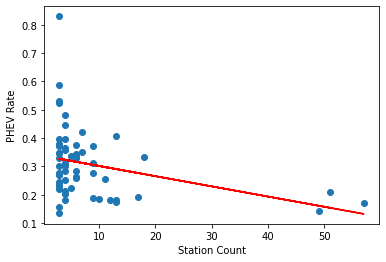

<AxesSubplot:>

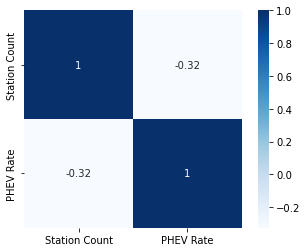

In [202]:
linear_model_main(ev_car_station_pop_wa, 'Station Count', 'PHEV Rate')
corr_all_wa = ev_car_station_pop_wa[['Station Count', 'PHEV Rate']].corr()
sns.heatmap(corr_all_wa, cmap='Blues', square=True, annot=True)

In [203]:
x = sm.add_constant(ev_car_station_pop_wa.iloc[:, 2:])
model = sm.OLS(ev_car_station_pop_wa['Station Count'], x)
result = model.fit()
result.summary()

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Station Count   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2.881
Date:                Fri, 06 May 2022   Prob (F-statistic):             0.0308
Time:                        17:47:57   Log-Likelihood:                -222.16
No. Observations:                  60   AIC:                             454.3
Df Residuals:                      55   BIC:                             464.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1778      5.800      2.445      0.018       2.555      25.801
Count          0.0003      0.000      2.006      0.050    2.32e-07       0.001
PHEV Rate    -14.6152     13.629     -1.072      0.288     -41.928      12.697
population    -0.0002      0.000     -1.544      0.128      -0.000    5.37e-05
area          -0.0014      0.003     -0.462      0.646      -0.008       0.005
==============================================================================
Omnibus:                       58.773   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.671
Skew:                           2.861   Prob(JB):                     1.70e-64
Kurtosis:                      12.204   Cond. No.                     4.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### In this way, we may assume that there is no or very small relationship between EV owner’s decision and Charging Station. EV consumers purchase specific cars for other reasons. In fact, Even the Battery Electric Vehicle, energy supports them to drive for hundreds of kilometers. So in the face of technology, the reality factor has been greatly mitigated.